<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-17 12:55:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  46.8MB/s    in 4.2s    

2025-05-17 12:55:24 (47.7 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 127.9 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 63.1 MB/s eta 0:00:00


In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [24]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [28]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)



   COUNT(*)
0     65437


**Demo 2: List all tables**


In [32]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [36]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


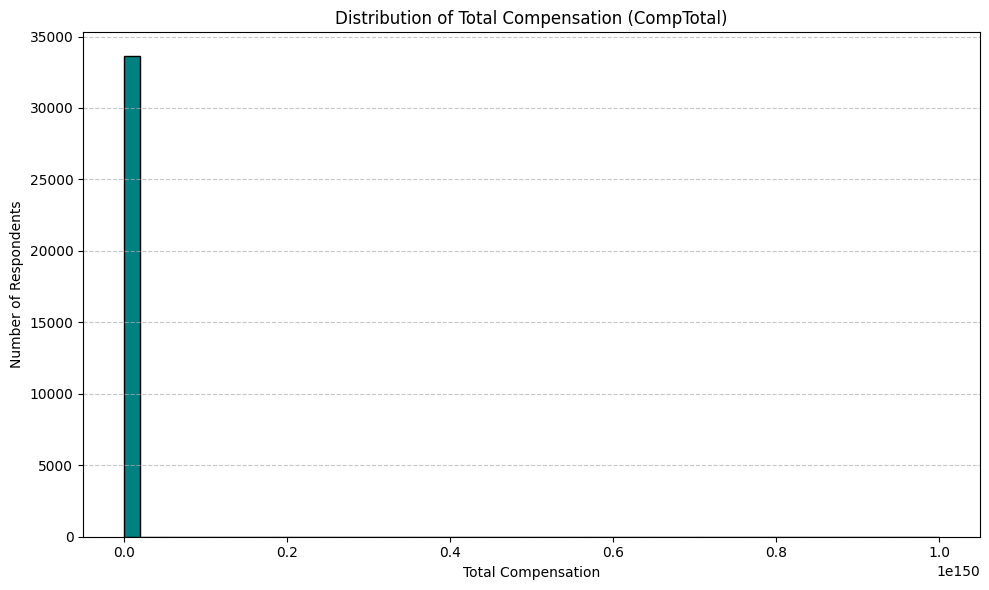

In [39]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to SQLite and read CompTotal data
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)
conn.close()

# Drop missing or zero values
df = df[df['CompTotal'].notna()]
df = df[df['CompTotal'] > 0]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'], bins=50, color='teal', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


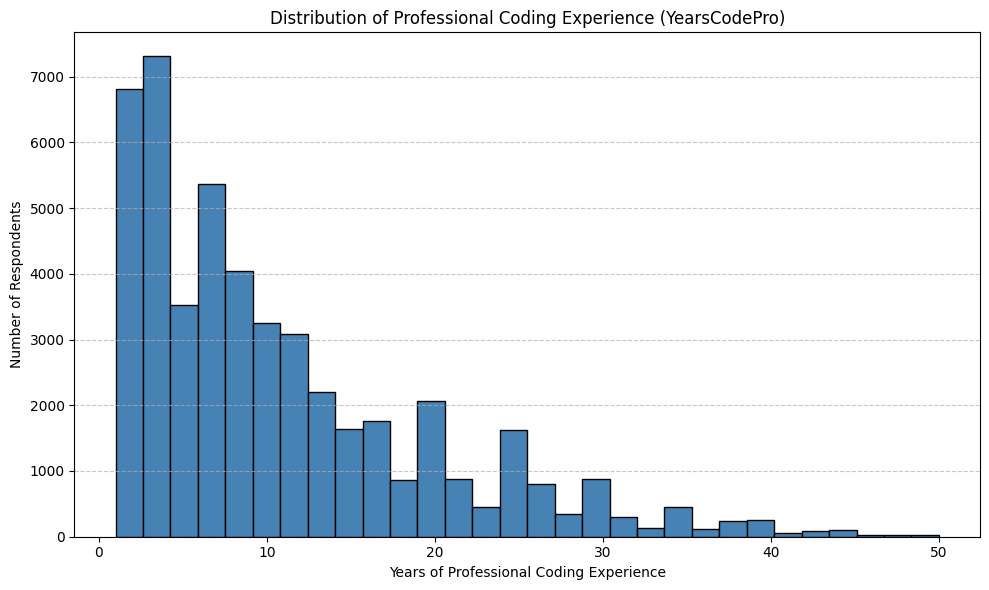

In [40]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load YearsCodePro data
df = pd.read_sql_query("SELECT YearsCodePro FROM main", conn)
conn.close()

# Convert values to numeric where possible
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing values
df = df.dropna()

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['YearsCodePro'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


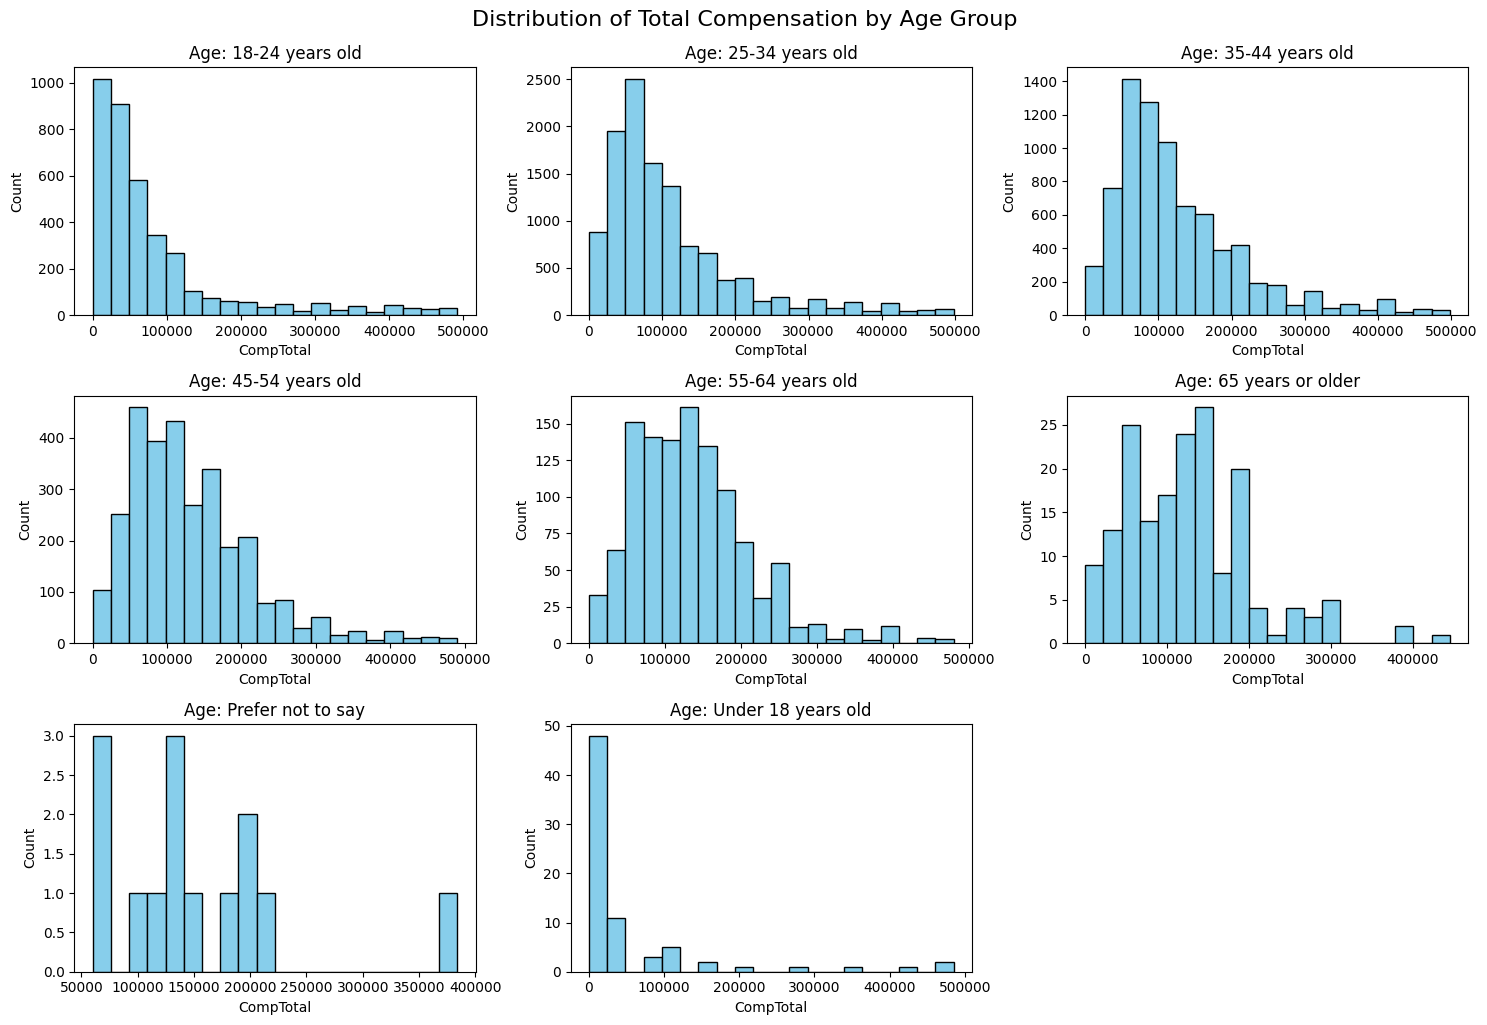

In [41]:
## Write your code here
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Load data from SQLite
conn = sqlite3.connect('survey-data.sqlite')
df = pd.read_sql_query("SELECT Age, CompTotal FROM main", conn)
conn.close()

# Clean data
df = df.dropna(subset=['Age', 'CompTotal'])
df = df[df['CompTotal'] < 500000]  # Filter out extreme outliers

# Get unique age groups
age_groups = df['Age'].unique()

# Plot histograms
fig, axes = plt.subplots(nrows=len(age_groups)//3 + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, age in enumerate(sorted(age_groups)):
    subset = df[df['Age'] == age]['CompTotal']
    axes[i].hist(subset, bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Age: {age}")
    axes[i].set_xlabel("CompTotal")
    axes[i].set_ylabel("Count")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Distribution of Total Compensation by Age Group", fontsize=16, y=1.02)
plt.show()



**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


Unique Age groups: ['35-44 years old' '45-54 years old' '25-34 years old' '55-64 years old'
 '18-24 years old' '65 years or older' 'Prefer not to say'
 'Under 18 years old']
Unique TimeSearching values: ['30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']


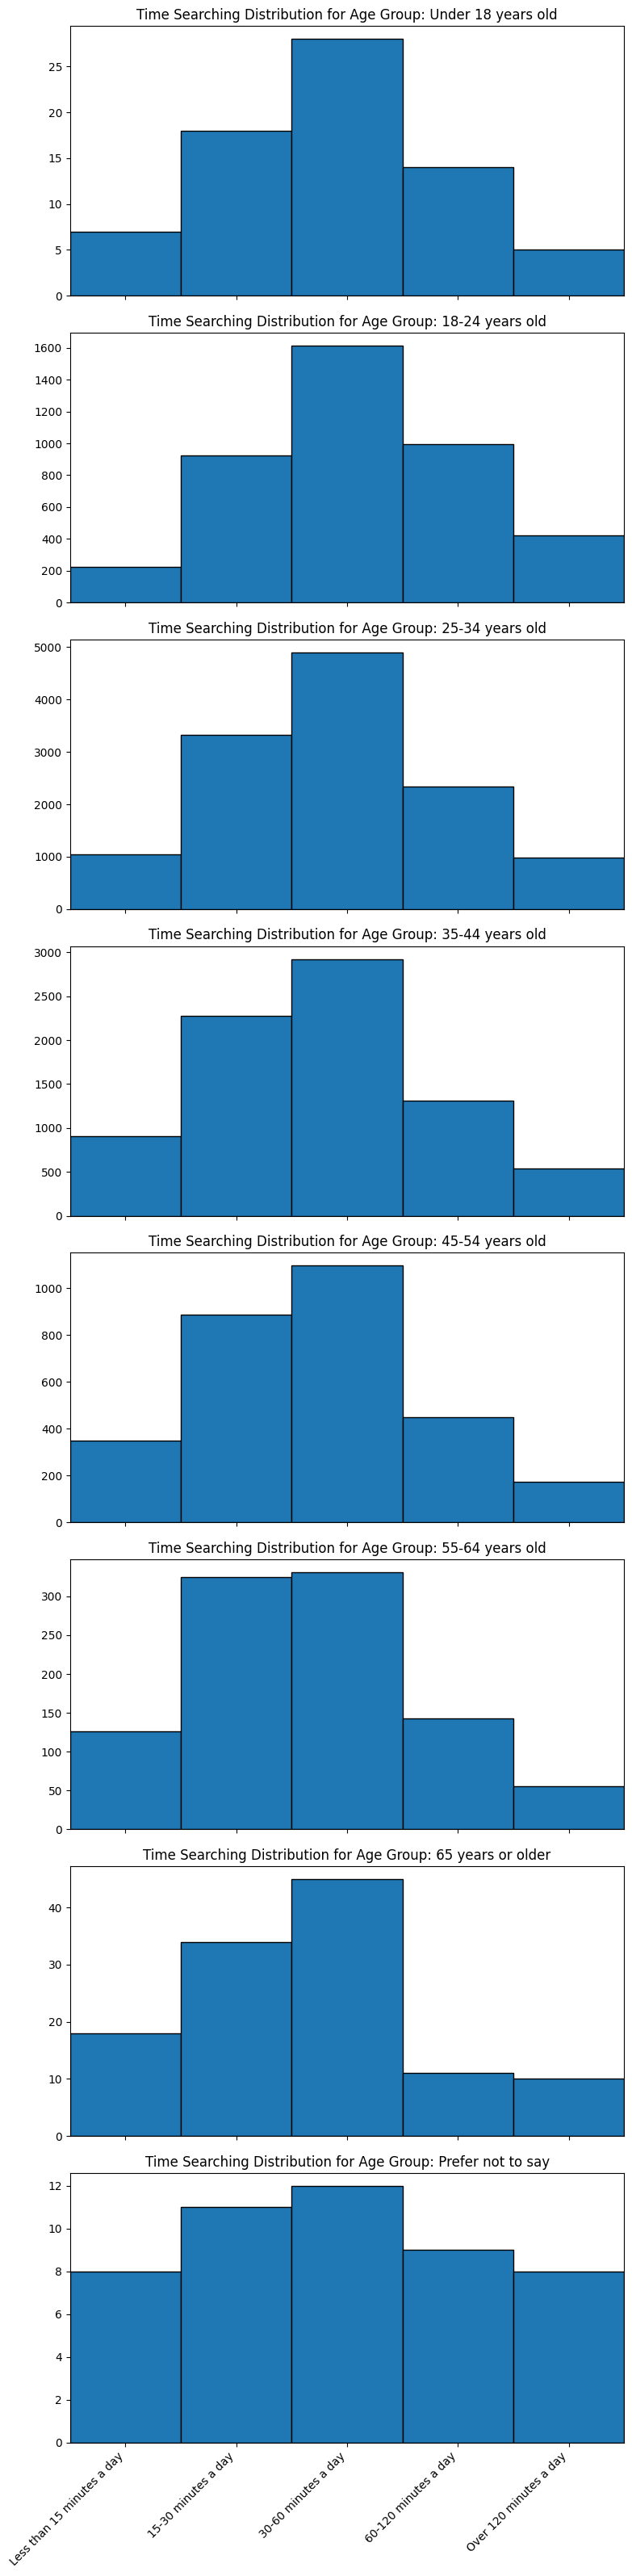

In [43]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query Age and TimeSearching where not null
query = """
SELECT Age, "TimeSearching"
FROM main
WHERE "TimeSearching" IS NOT NULL
AND Age IS NOT NULL
"""

df_time = pd.read_sql_query(query, conn)
conn.close()

# Check unique values in TimeSearching and Age
print("Unique Age groups:", df_time['Age'].unique())
print("Unique TimeSearching values:", df_time['TimeSearching'].unique())

# Map TimeSearching to ordinal numeric values for plotting
time_map = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'Over 120 minutes a day': 5
}
df_time['TimeSearchingNum'] = df_time['TimeSearching'].map(time_map)

# Drop rows with unmapped TimeSearching values (if any)
df_time = df_time.dropna(subset=['TimeSearchingNum'])

# Optional: Sort Age groups for plotting order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Filter only age groups present in data and reorder
df_time = df_time[df_time['Age'].isin(age_order)]
df_time['Age'] = pd.Categorical(df_time['Age'], categories=age_order, ordered=True)

# Plot histograms of TimeSearching by Age group
fig, axes = plt.subplots(len(age_order), 1, figsize=(8, 4*len(age_order)), sharex=True)

for i, age_group in enumerate(age_order):
    ax = axes[i]
    subset = df_time[df_time['Age'] == age_group]
    if subset.empty:
        ax.text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center')
        ax.set_title(age_group)
        ax.set_yticks([])
        continue
    ax.hist(subset['TimeSearchingNum'], bins=range(1,7), edgecolor='black', align='left')
    ax.set_title(f"Time Searching Distribution for Age Group: {age_group}")
    ax.set_xlim(0.5, 5.5)
    ax.set_xticks(range(1,6))
    ax.set_xticklabels(list(time_map.keys()), rotation=45, ha='right')

plt.tight_layout()
plt.show()



### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


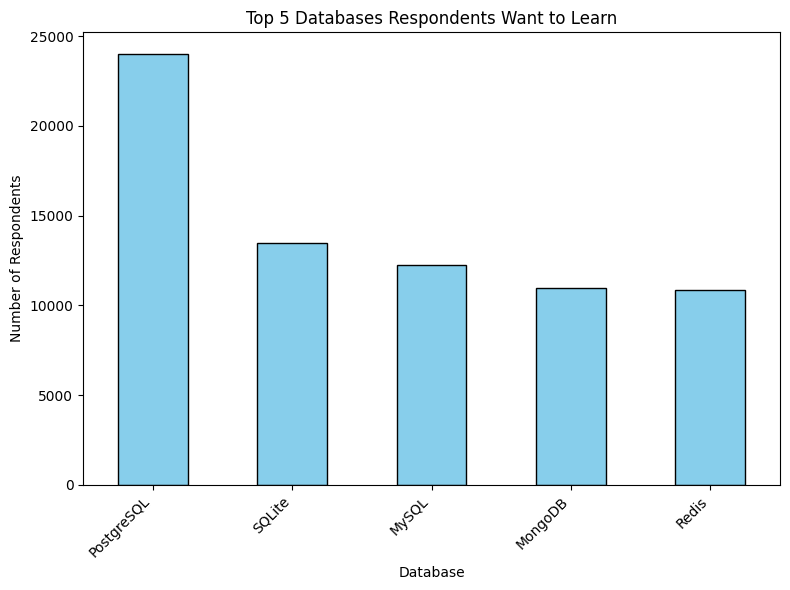

In [44]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query DatabaseWantToWorkWith where not null
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df_db = pd.read_sql_query(query, conn)
conn.close()

# The values are often semi-colon separated lists; split and flatten
all_databases = df_db['DatabaseWantToWorkWith'].dropna().str.split(';').explode()

# Count the frequency of each database
db_counts = all_databases.value_counts()

# Select top 5
top5_dbs = db_counts.head(5)

# Plot histogram (bar chart) of top 5 desired databases
plt.figure(figsize=(8,6))
top5_dbs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Databases Respondents Want to Learn')
plt.ylabel('Number of Respondents')
plt.xlabel('Database')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


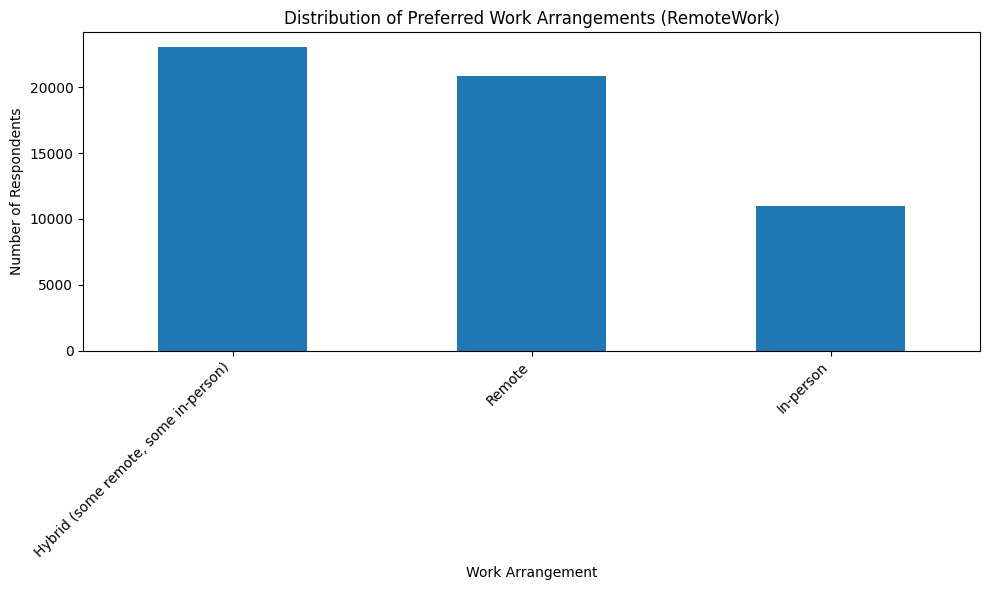

In [45]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query the RemoteWork column
query = """
SELECT RemoteWork 
FROM main
WHERE RemoteWork IS NOT NULL
"""
df_remote = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Count frequency of each RemoteWork category
remote_counts = df_remote['RemoteWork'].value_counts().head(10)  # top 10 categories

# Plot histogram (bar chart) of remote work preferences
plt.figure(figsize=(10,6))
remote_counts.plot(kind='bar')
plt.title('Distribution of Preferred Work Arrangements (RemoteWork)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


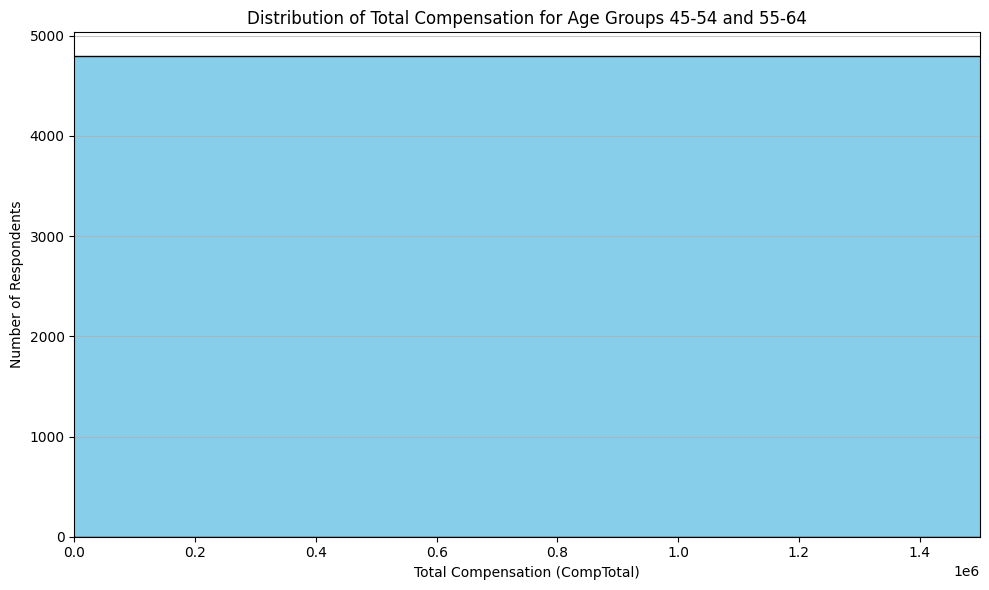

In [46]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the age groups of interest
age_groups = ['45-54 years old', '55-64 years old']

# Query CompTotal for respondents in the age groups 45-54 and 55-64
query = f"""
SELECT CompTotal, Age
FROM main
WHERE Age IN ({','.join(['?']*len(age_groups))})
AND CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(query, conn, params=age_groups)

# Close the connection
conn.close()

# Plot histogram of CompTotal for mid-career respondents
plt.figure(figsize=(10,6))
plt.hist(df_comp['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation for Age Groups 45-54 and 55-64')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.xlim(0, df_comp['CompTotal'].quantile(0.95))  # limit x-axis to 95th percentile to avoid extreme outliers
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


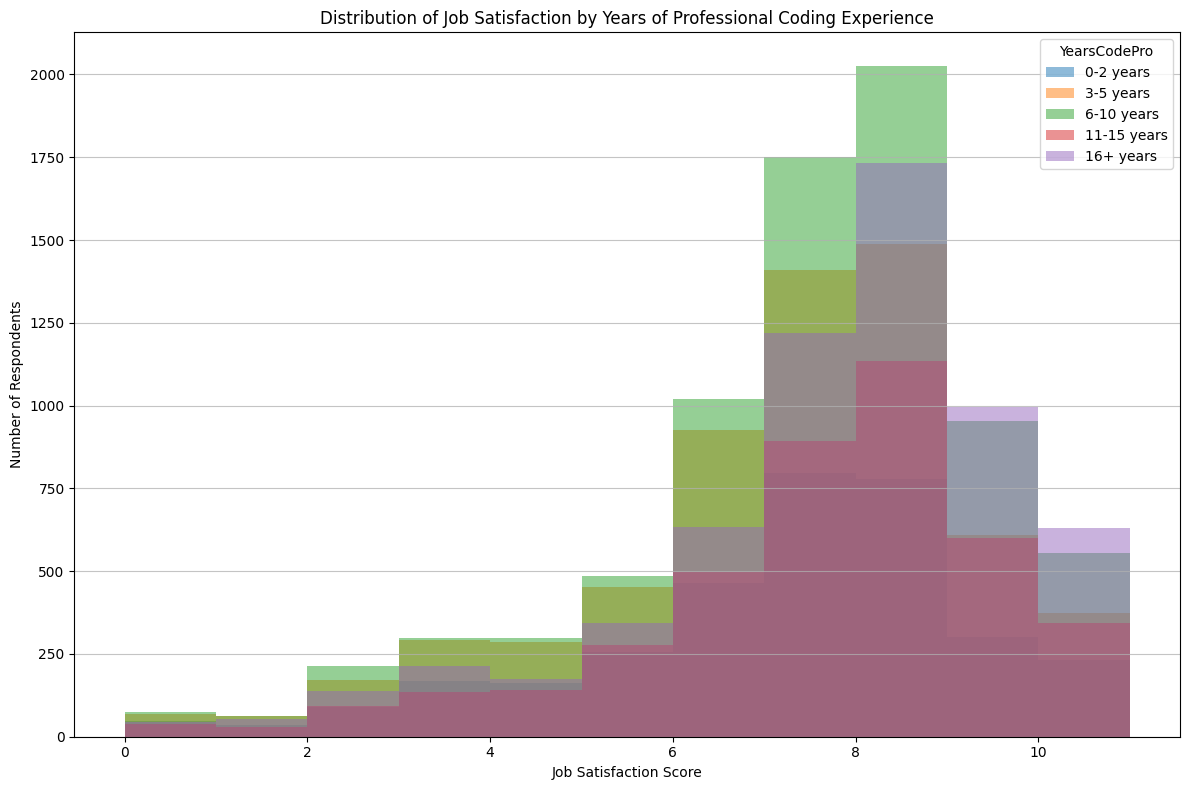

In [47]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query JobSat and YearsCodePro, excluding NULLs
query = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL
AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert YearsCodePro to numeric, coercing errors to NaN (if any)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with NaN after conversion
df = df.dropna(subset=['YearsCodePro'])

# Create bins for YearsCodePro (e.g., 0-2, 3-5, 6-10, 11-15, 16+ years)
bins = [0, 2, 5, 10, 15, df['YearsCodePro'].max()]
labels = ['0-2', '3-5', '6-10', '11-15', '16+']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=True)

# Plot histograms of JobSat by experience groups
plt.figure(figsize=(12,8))

for group in labels:
    subset = df[df['ExperienceGroup'] == group]
    plt.hist(subset['JobSat'], bins=range(0,12), alpha=0.5, label=f'{group} years')

plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Job Satisfaction by Years of Professional Coding Experience')
plt.legend(title='YearsCodePro')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [48]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
